The silhouette score for k=2 is 0.6637036342754642


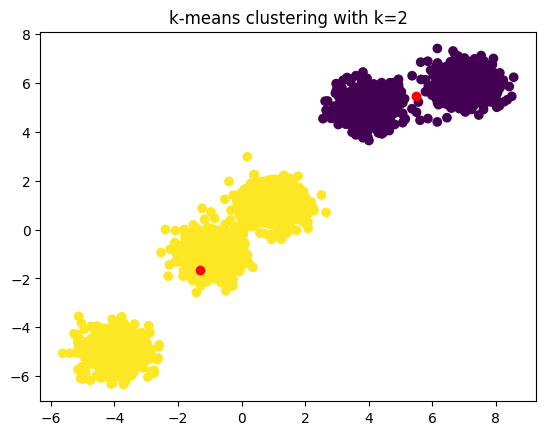

The silhouette score for k=3 is 0.723724416295024


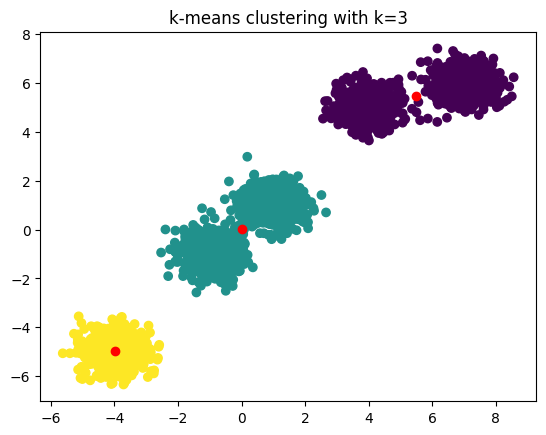

The silhouette score for k=4 is 0.7062626897971855


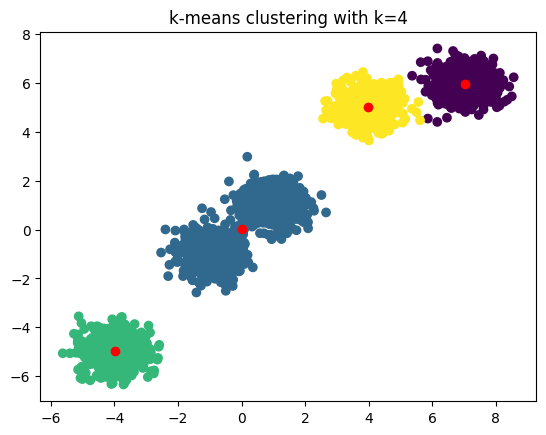

The silhouette score for k=5 is 0.728100440716041


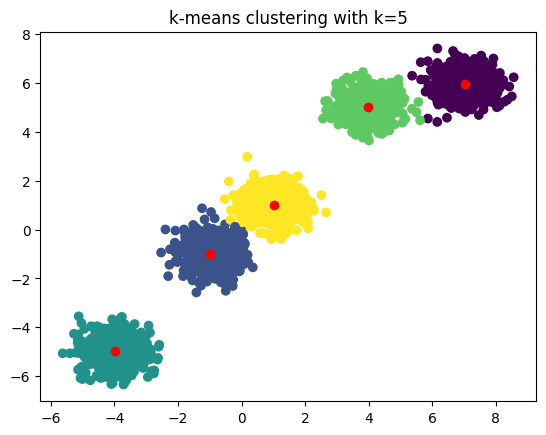

The silhouette score for k=6 is 0.6449068879675731


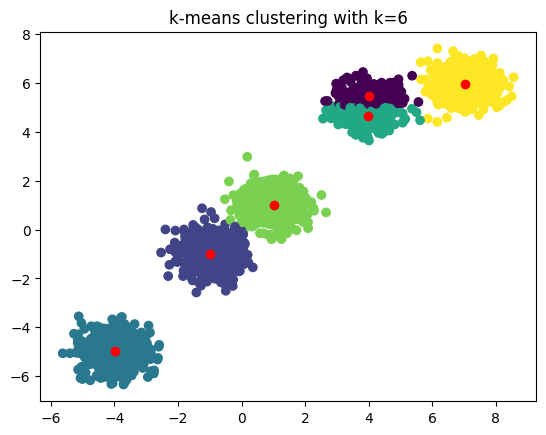

The silhouette score for k=7 is 0.6395940633268151


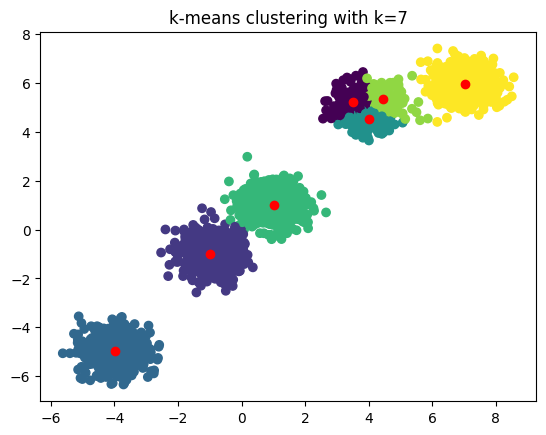

The silhouette score for k=8 is 0.5634141957814323


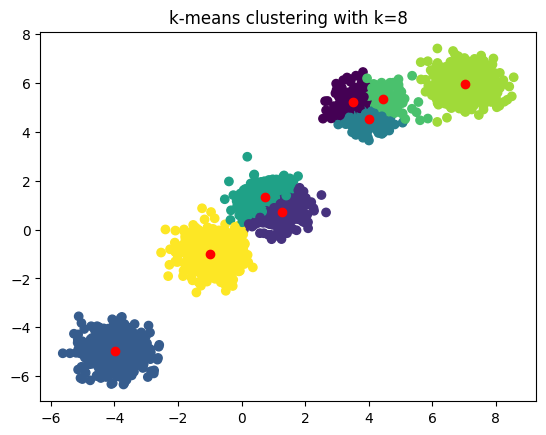

The silhouette score for k=9 is 0.4630123519556602


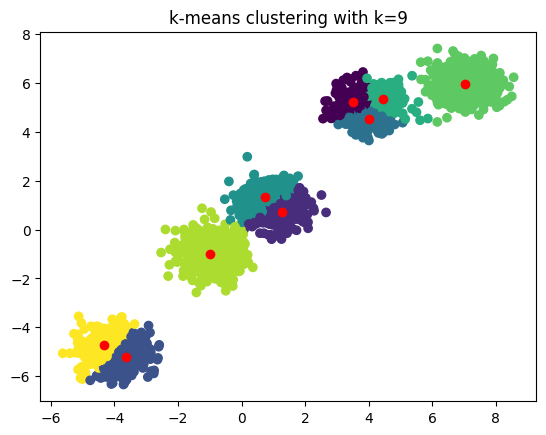

The silhouette score for k=10 is 0.46677126527537066


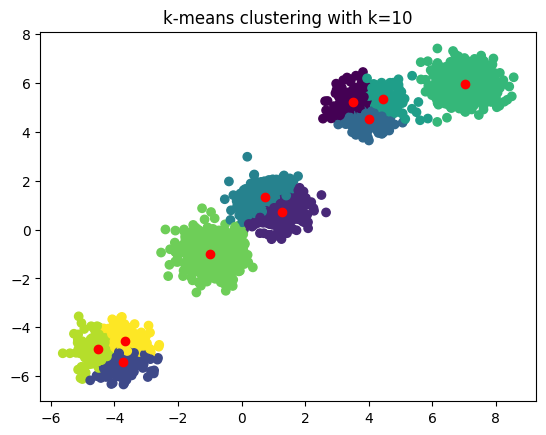

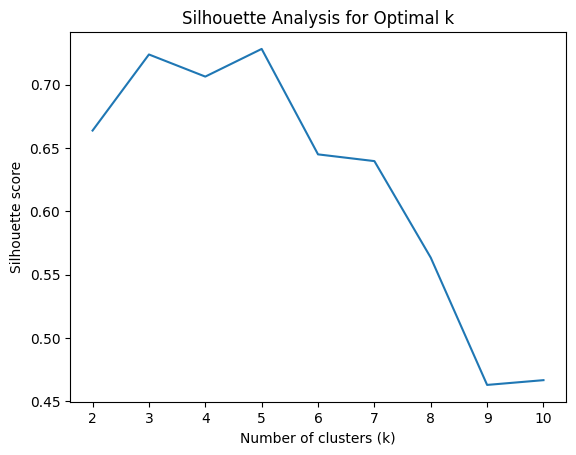

The optimal value of k is 5


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import Q2_utilities as utils1
silhouette_scores = []
data = np.load('kmeans_data.npy')
'''
implement the k-means clustering algorithm for different values of k
Checking the value of k for which the silhouette score is maximum
We check only for the first 10 values of k as we can observe that the silhouette
graph starts to flatten out after k=10 and so we can conclude that the optimal value
of k is 10, for which the silhouette score is maximum
'''

for k in range(2,11):
    # maximum number of iterations in case the algorithm does not converge
    max_iteration = 5000
    '''
    centroids holds the coordinates of the centroids of the k clusters
    cluster_assignments holds the cluster to which each data point is assigned
    iteration holds the number of iterations that the algorithm has run for
    distances holds the distance of each data point to each centroid
    '''
    centroids, cluster_assignments, iteration, distances = utils1.k_means_algorithm(data, k, max_iteration)
    # calculate the silhouette score
    silhouette_score = utils1.silhouette_score_calculation(data, k, cluster_assignments, distances, centroids)
    print(f"The silhouette score for k={k} is {silhouette_score}")
    # plot the data points and the centroids
    plt.scatter(data[:,0], data[:,1], c=cluster_assignments)
    plt.scatter(centroids[:,0], centroids[:,1], c='red')
    plt.title(f'k-means clustering with k={k}')
    plt.show()
    # store the silhouette score and the k-means object
    silhouette_scores.append(silhouette_score)
# plot the silhouette scores as a function of k
plt.plot(range(2,11), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()
print(f"The optimal value of k is {np.argmax(silhouette_scores)+2}")

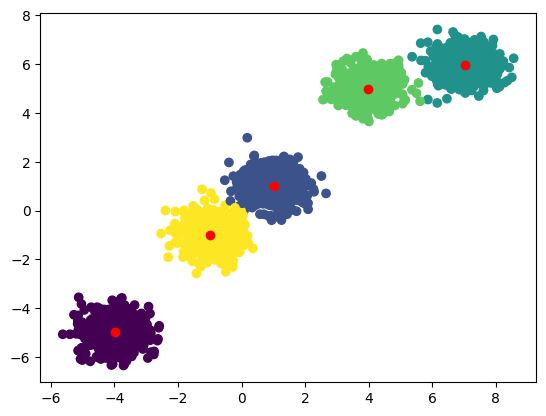

The fuzzy c-means algorithm has converged
The number of iterations required for convergence: 26
The centroids are: [[-3.97817738 -4.96995116]
 [ 1.01753602  1.02065308]
 [ 7.02712666  5.95304487]
 [ 3.97788145  4.99347604]
 [-0.99312603 -1.00643444]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('kmeans_data.npy')
no_of_clusters = 5
m_value = 2 
beta_value = 0.3
max_iterations = 5000
tolerance = 1e-6
data = np.load('kmeans_data.npy')
# run the fuzzy c-means algorithm 
centroids, cluster_assignments, distances, membership_matrix = utils1.fuzzy_c_means(data, no_of_clusters, m_value, beta_value, max_iterations, tolerance)
# plot the results
plt.scatter(data[:,0], data[:,1], c=cluster_assignments)
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()
print("The fuzzy c-means algorithm has converged")
print(f'The number of iterations required for convergence: {iteration}')
print(f'The centroids are: {centroids}')


In [29]:
# run the J value calculation function the clustering already done
J_value = utils1.J_value_calculation(data, no_of_clusters, m_value, beta_value, max_iterations, tolerance, centroids, cluster_assignments, distances, membership_matrix)
print(f'The J value for the clustering already done is {J_value}')

The J value for the clustering already done is 1303.1739997202171
